- Height
- Weight
- Type
- evolutionary stage

In [7]:
import polars as pl
import numpy as np



In [8]:
pokedex_df = pl.read_csv('pokemons_151.csv').select(
    
    pl.col("#").cast(pl.UInt8),
    pl.col("name").cast(pl.Utf8),
    pl.col("height_cm").cast(pl.Float32)*100,
    pl.col("weight_kg").cast(pl.Float32),
    pl.col("primary_type").cast(pl.Utf8),
    pl.col("secondary_type").cast(pl.Utf8),
    pl.col("stage").cast(pl.UInt8),

)

pokedex_df


#,name,height_cm,weight_kg,primary_type,secondary_type,stage
u8,str,f32,f32,str,str,u8
1,"""bulbasaur""",70.0,6.9,"""grass""","""poison""",1
2,"""ivysaur""",100.0,13.0,"""grass""","""poison""",2
3,"""venusaur""",200.0,100.0,"""grass""","""poison""",3
4,"""charmander""",60.000004,8.5,"""fire""","""fire""",1
5,"""charmeleon""",110.0,19.0,"""fire""","""fire""",2
6,"""charizard""",170.0,90.5,"""fire""","""flying""",3
7,"""squirtle""",50.0,9.0,"""water""","""water""",1
8,"""wartortle""",100.0,22.5,"""water""","""water""",2
9,"""blastoise""",160.0,85.5,"""water""","""water""",3


In [9]:
def mock_data(mean, size=151):
    # Generate random data
    random_data = np.random.normal(size=size)

    # Adjust data to have the desired mean
    adjusted_data = random_data + (mean - np.mean(random_data))

    return adjusted_data


In [10]:
df_len = len(pokedex_df)

nrs = np.array([])
names = np.array([])

heights = np.array([])
weights = np.array([])

primary_types = np.array([])
secondary_types = np.array([])
stages = np.array([])


for idx in range(df_len):
    
    nr = pokedex_df[idx, 0]
    name = pokedex_df[idx, 1]
    height = pokedex_df[idx, 2]
    weight = pokedex_df[idx, 3]
    primary_type = pokedex_df[idx, 4]
    secondary_type = pokedex_df[idx, 5]
    stage = pokedex_df[idx, 6]


    mock_heights = mock_data(height)
    mock_weights = mock_data(weight)


    heights = np.append(heights, mock_heights)
    weights = np.append(weights, mock_weights)


    mock_nrs = np.array([nr for _ in range(151)])
    nrs = np.append(nrs, mock_nrs)

    mock_names = np.array([name for _ in range(151)])
    names = np.append(names, mock_names)

    mock_primary_types = np.array([primary_type for _ in range(151)])
    primary_types = np.append(primary_types, mock_primary_types)

    mock_secondary_types = np.array([secondary_type for _ in range(151)])
    secondary_types = np.append(secondary_types, mock_secondary_types)

    mock_stages = np.array([stage for _ in range(151)])
    stages = np.append(stages, mock_stages)



mock_pokemons = (nrs, names, heights, weights, primary_types, secondary_types, stages)

#print(mock_pokemons)

df = pl.DataFrame(
[
    pl.Series("nr", mock_pokemons[0]),
    pl.Series("name", mock_pokemons[1]),
    pl.Series("height_cm", mock_pokemons[2]),
    pl.Series("weight_kg", mock_pokemons[3]),
    pl.Series("primary", mock_pokemons[4]),
    pl.Series("secondary", mock_pokemons[5]),
    pl.Series("stage", mock_pokemons[6])
]

).with_columns(

    pl.col("nr").cast(pl.UInt8),
    pl.col("name").cast(pl.Utf8),
    pl.col("height_cm").cast(pl.Float32),
    pl.col("weight_kg").cast(pl.Float32),
    pl.col("primary").cast(pl.Utf8),
    pl.col("secondary").cast(pl.Utf8),
    pl.col("stage").cast(pl.UInt8),

)

df


nr,name,height_cm,weight_kg,primary,secondary,stage
u8,str,f32,f32,str,str,u8
1,"""bulbasaur""",70.699242,7.846095,"""grass""","""poison""",1
1,"""bulbasaur""",69.456413,6.787691,"""grass""","""poison""",1
1,"""bulbasaur""",68.796593,7.123094,"""grass""","""poison""",1
1,"""bulbasaur""",68.553848,8.003351,"""grass""","""poison""",1
1,"""bulbasaur""",71.466866,7.528287,"""grass""","""poison""",1
1,"""bulbasaur""",70.657722,6.211697,"""grass""","""poison""",1
1,"""bulbasaur""",69.263306,7.800478,"""grass""","""poison""",1
1,"""bulbasaur""",70.005913,5.902987,"""grass""","""poison""",1
1,"""bulbasaur""",68.403908,6.483836,"""grass""","""poison""",1


In [62]:

def pokemon_stats(pokemon):
    
    stats_range = df.filter(pl.col('name') == pokemon)    

    height_weight = stats_range.describe().row(2)[3:5]
    nr = stats_range[0,0]
    primary_type, secondary_type = stats_range[0, 5], stats_range[0, 4]

    stats = (nr,) + (pokemon,) + height_weight + (primary_type, secondary_type)
    
    return stats




pokemon_stats('wartortle')

(8, 'wartortle', 100.0, 22.5, 'water', 'water')

In [63]:

#df.write_csv("151_x_151_pokemons.csv")

pdf = pl.read_csv('151_x_151_pokemons.csv').with_columns(

    pl.col("nr").cast(pl.UInt8),
    pl.col("name").cast(pl.Utf8),
    pl.col("height_cm").cast(pl.Float32),
    pl.col("weight_kg").cast(pl.Float32),
    pl.col("primary").cast(pl.Utf8),
    pl.col("secondary").cast(pl.Utf8),
    pl.col("stage").cast(pl.UInt8),

)

pdf.describe()

describe,nr,name,height_cm,weight_kg,primary,secondary,stage
str,f64,str,f64,f64,str,str,f64
"""count""",22801.0,"""22801""",22801.0,22801.0,"""22801""","""22801""",22801.0
"""null_count""",0.0,"""0""",0.0,0.0,"""0""","""0""",0.0
"""mean""",76.0,null,119.4702,45.950993,null,null,1.741722
"""std""",43.589945,null,95.950104,59.26062,null,null,0.713774
"""min""",1.0,"""abra""",16.911406,-2.105201,"""bug""","""bug""",1.0
"""25%""",38.0,null,69.464035,9.726873,null,null,1.0
"""50%""",76.0,null,101.182114,30.012793,null,null,2.0
"""75%""",114.0,null,149.64537,56.799854,null,null,2.0
"""max""",151.0,"""zubat""",884.85675,462.648468,"""water""","""water""",3.0


In [29]:
plabels = df['primary'].unique()
slabels = df['secondary'].unique()
cmlabels = df['name'].unique()

print(list(plabels))
print(list(slabels))
#cmlabels

['water', 'rock', 'fighting', 'bug', 'fairy', 'ice', 'grass', 'ghost', 'psychic', 'dragon', 'ground', 'fire', 'electric', 'normal', 'poison']
['normal', 'rock', 'water', 'steel', 'flying', 'ice', 'fighting', 'electric', 'poison', 'bug', 'fairy', 'dragon', 'psychic', 'ground', 'grass', 'fire']


In [13]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example


values = array(plabels)
print(values)

# integer encode - alfabetisk ordning
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(plabels)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)


['dragon' 'psychic' 'grass' 'rock' 'bug' 'ice' 'fairy' 'fire' 'poison'
 'ground' 'electric' 'ghost' 'water' 'normal' 'fighting']
[ 1 12  7 13  0  9  3  5 11  8  2  6 14 10  4]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
['dragon']


In [14]:
encoded_df = df.to_dummies(columns=["primary", "secondary", 'stage'])
encoded_df



nr,name,height_cm,weight_kg,primary_bug,primary_dragon,primary_electric,primary_fairy,primary_fighting,primary_fire,primary_ghost,primary_grass,primary_ground,primary_ice,primary_normal,primary_poison,primary_psychic,primary_rock,primary_water,secondary_bug,secondary_dragon,secondary_electric,secondary_fairy,secondary_fighting,secondary_fire,secondary_flying,secondary_grass,secondary_ground,secondary_ice,secondary_normal,secondary_poison,secondary_psychic,secondary_rock,secondary_steel,secondary_water,stage_1,stage_2,stage_3
u8,str,f32,f32,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8
1,"""bulbasaur""",70.699242,7.846095,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,"""bulbasaur""",69.456413,6.787691,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,"""bulbasaur""",68.796593,7.123094,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,"""bulbasaur""",68.553848,8.003351,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,"""bulbasaur""",71.466866,7.528287,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,"""bulbasaur""",70.657722,6.211697,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,"""bulbasaur""",69.263306,7.800478,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,"""bulbasaur""",70.005913,5.902987,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,"""bulbasaur""",68.403908,6.483836,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [15]:
X = encoded_df[:, 2:].to_numpy()
y = encoded_df['name'].to_numpy()


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

print(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#print(X_train)

[[880.1919    210.0123      0.        ...   1.          0.
    0.       ]
 [ 78.998184   19.006712    0.        ...   1.          0.
    0.       ]
 [ 28.52526     1.111306    0.        ...   1.          0.
    0.       ]
 ...
 [ 40.718033    6.245504    0.        ...   1.          0.
    0.       ]
 [110.47063    89.10972     0.        ...   1.          0.
    0.       ]
 [ 39.376564    5.4282336   0.        ...   1.          0.
    0.       ]]


In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train, y_train)





KNeighborsClassifier(n_neighbors=15)

In [19]:
y_pred = classifier.predict(X_test)



In [20]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=cmlabels)

print(classification_report(y_test, y_pred))
print(cm)



              precision    recall  f1-score   support

        abra       1.00      1.00      1.00        28
  aerodactyl       1.00      1.00      1.00        32
    alakazam       1.00      1.00      1.00        27
       arbok       1.00      1.00      1.00        41
    arcanine       1.00      1.00      1.00        23
    articuno       1.00      1.00      1.00        34
    beedrill       1.00      1.00      1.00        26
  bellsprout       0.96      0.93      0.94        27
   blastoise       1.00      1.00      1.00        23
   bulbasaur       0.93      0.96      0.94        26
  butterfree       1.00      1.00      1.00        20
    caterpie       1.00      1.00      1.00        22
     chansey       1.00      1.00      1.00        29
   charizard       1.00      1.00      1.00        32
  charmander       0.68      0.47      0.56        32
  charmeleon       0.63      0.59      0.61        32
    clefable       1.00      1.00      1.00        29
    clefairy       1.00    

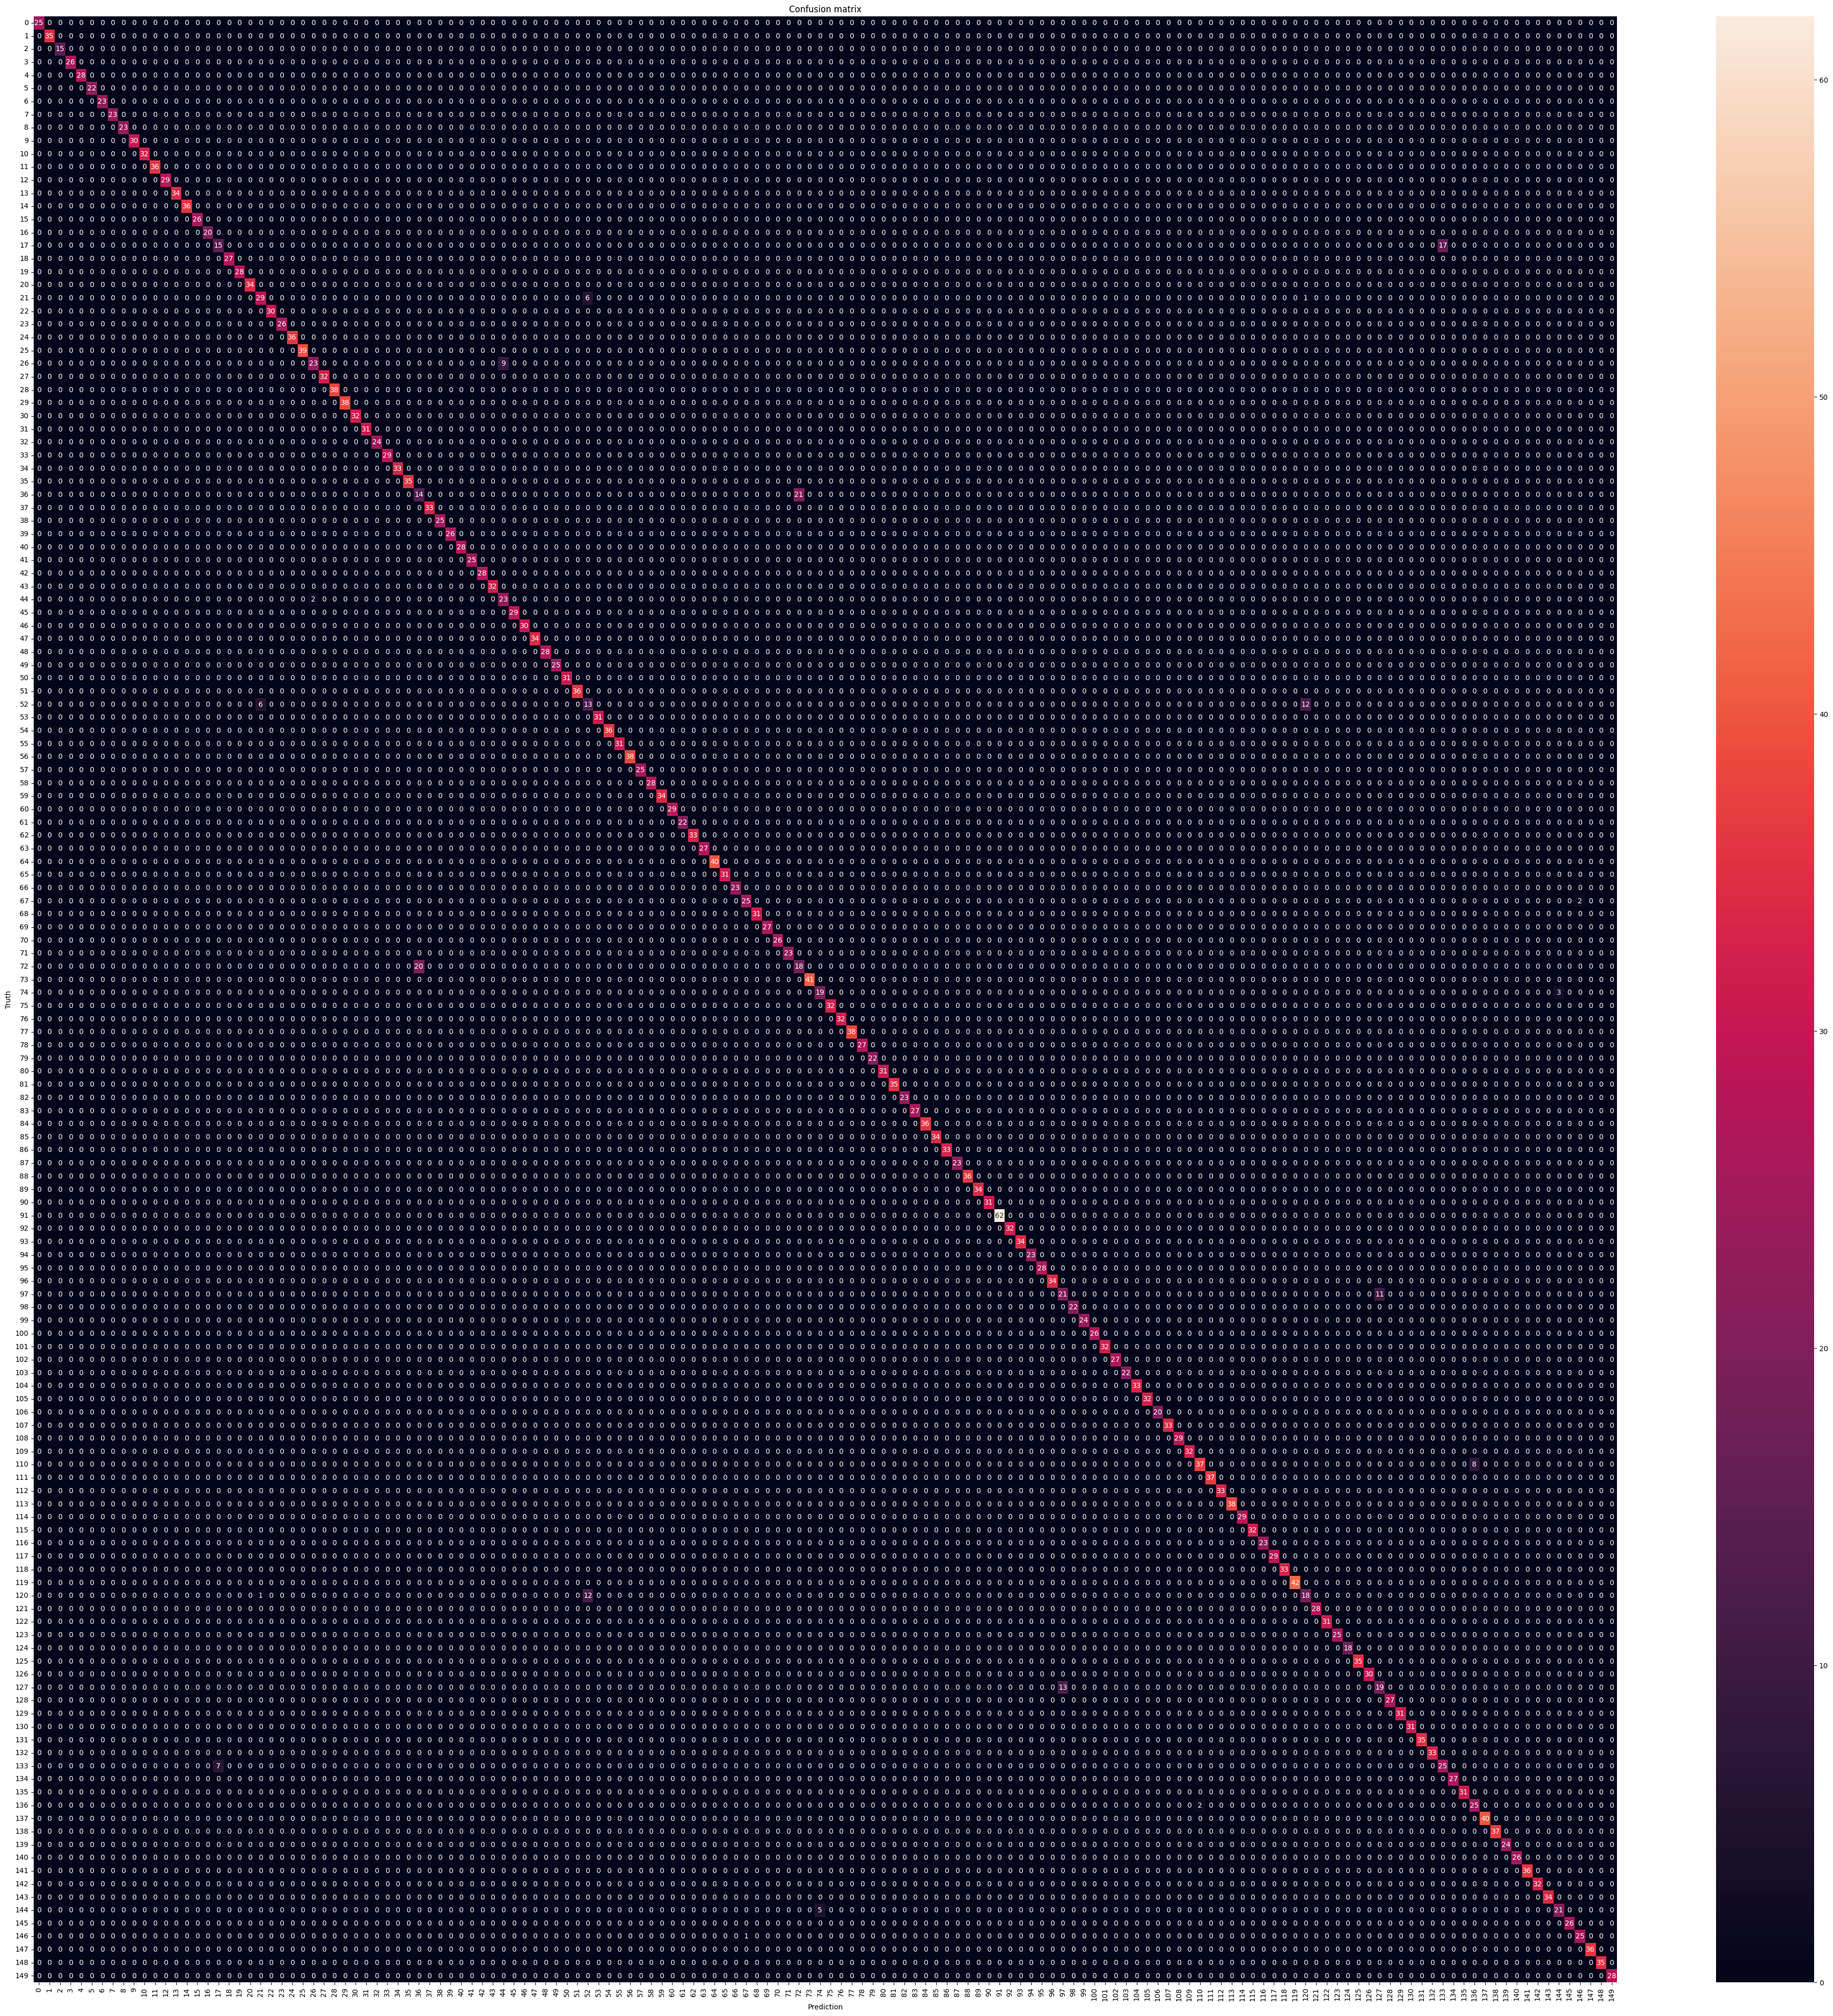

In [21]:
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize=(50, 50))
sns.heatmap(cm, annot=True)

plt.title("Confusion matrix")
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show()

In [22]:
p_fillers = ['psychic', 'bug', 'normal', 'fairy', 'dragon', 'electric', 'fighting', 'ice', 'poison', 'rock', 'ghost', 
             'ground', 'water',  'grass', 'fire', 'psychic', 'bug', 'normal', 'fairy', 'dragon', 'electric', 'fighting', 
             'ice', 'poison', 'rock', 'ghost', 'ground', 'water',  'grass', 'fire', 'ground', 'water',  'grass', 'fire', 'grass', 'fire']

s_fillers = ['fighting',  'fairy', 'electric', 'ice', 'grass', 'psychic', 'flying', 'steel', 'normal', 'rock', 'bug', 'dragon',
             'water',  'ground', 'poison', 'fire', 'fighting',  'fairy', 'electric', 'ice', 'grass', 'psychic', 'flying', 'steel', 
             'normal', 'rock', 'bug', 'dragon', 'water',  'ground', 'poison', 'fire', 'water',  'ground', 'poison', 'fire']


w_fillers = [123]*36
h_fillers = [321]*36
stage_fillers = [1,2,3]*10 + [1,2,3,1,2,3]


höjd, vikt, primary, secondary, evo_stage = [162, 54, 'water', 'poison', 2]
test_df = pl.DataFrame({
    'height': [höjd] + h_fillers, 'weight': [vikt] + w_fillers,
    'primary': [primary]+ p_fillers, 'secondary': [secondary] + s_fillers,
    'stage': [evo_stage] + stage_fillers
})
test_df = test_df.to_dummies(columns=["primary", "secondary", 'stage']) #hot encoding
test_df = test_df[0,:].to_numpy()


z_test = scaler.transform(test_df)
prediction = classifier.predict(z_test)
#predictions = classifier.predict_proba(z_test)

print(f"""
höjd: {höjd} cm
vikt: {vikt} kg
primärt element: {primary}
sekundärt element {secondary}
evolutionär fas: {evo_stage}

pokemon ---> {prediction}""")




höjd: 162 cm
vikt: 54 kg
primärt element: water
sekundärt element poison
evolutionär fas: 2

pokemon ---> ['tentacruel']


In [23]:
df.filter(pl.col('name') == 'tentacruel')

nr,name,height_cm,weight_kg,primary,secondary,stage
u8,str,f32,f32,str,str,u8
73,"""tentacruel""",161.892075,54.814125,"""water""","""poison""",2
73,"""tentacruel""",159.852631,56.14809,"""water""","""poison""",2
73,"""tentacruel""",161.971375,52.967979,"""water""","""poison""",2
73,"""tentacruel""",160.188599,54.373318,"""water""","""poison""",2
73,"""tentacruel""",159.03804,53.830235,"""water""","""poison""",2
73,"""tentacruel""",157.274872,54.622475,"""water""","""poison""",2
73,"""tentacruel""",160.228714,53.765812,"""water""","""poison""",2
73,"""tentacruel""",159.060043,54.499901,"""water""","""poison""",2
73,"""tentacruel""",159.805023,56.175072,"""water""","""poison""",2


In [24]:
from sklearn.naive_bayes import GaussianNB

gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)

gnb_pred = gnb_classifier.predict(X_test)

In [25]:
gnb_pred

array(['kabuto', 'gastly', "farfetch'd", ..., 'tauros', 'venomoth',
       'machop'], dtype='<U10')

In [26]:

gnbcm = confusion_matrix(y_test, y_pred, labels=cmlabels)

print(classification_report(y_test, y_pred))
print(gnbcm)



              precision    recall  f1-score   support

        abra       1.00      1.00      1.00        28
  aerodactyl       1.00      1.00      1.00        32
    alakazam       1.00      1.00      1.00        27
       arbok       1.00      1.00      1.00        41
    arcanine       1.00      1.00      1.00        23
    articuno       1.00      1.00      1.00        34
    beedrill       1.00      1.00      1.00        26
  bellsprout       0.96      0.93      0.94        27
   blastoise       1.00      1.00      1.00        23
   bulbasaur       0.93      0.96      0.94        26
  butterfree       1.00      1.00      1.00        20
    caterpie       1.00      1.00      1.00        22
     chansey       1.00      1.00      1.00        29
   charizard       1.00      1.00      1.00        32
  charmander       0.68      0.47      0.56        32
  charmeleon       0.63      0.59      0.61        32
    clefable       1.00      1.00      1.00        29
    clefairy       1.00    

In [27]:
from dataclasses import dataclass
import polars as pl
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



@dataclass
class Pokemon_modell:
    pokemon_df = pl.read_csv('151_x_151_pokemons.csv').with_columns(

        pl.col("nr").cast(pl.UInt8),
        pl.col("name").cast(pl.Utf8),
        pl.col("height_cm").cast(pl.Float32),
        pl.col("weight_kg").cast(pl.Float32),
        pl.col("primary").cast(pl.Utf8),
        pl.col("secondary").cast(pl.Utf8),
        pl.col("stage").cast(pl.UInt8),

    )


    def train_modell(self):


        encoded_pokemons = self.pokemon_df.to_dummies(columns=["primary", "secondary", 'stage'])

        X = encoded_pokemons[:, 2:].to_numpy() #all rows, but starting from col. index 2: height_cm
        y = encoded_pokemons['name'].to_numpy() #name col. as target


        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

        scaler = StandardScaler()
        scaler.fit(X_train)


        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)


        classifier = KNeighborsClassifier(n_neighbors=15)
        classifier.fit(X_train, y_train)

        return classifier, scaler


    def predict_pokemon(self, height, weight, primary, secondary, evo_stage):

        """ 

        The predict_pokemon function starts by creating filler data for the 'pred_df', 
        a dataframe used to one-hot-encode all values in 'primary', 'secondary' and 'stage' features.

        """

        p_fillers = [
            'psychic', 'bug', 'normal', 'fairy', 'dragon', 'electric', 'fighting', 'ice', 'poison', 'rock', 'ghost', 
            'ground', 'water',  'grass', 'fire', 'psychic', 'bug', 'normal', 'fairy', 'dragon', 'electric', 'fighting', 
            'ice', 'poison', 'rock', 'ghost', 'ground', 'water',  'grass', 'fire', 'ground', 'water',  'grass', 'fire', 'grass', 'fire'
        ]
        s_fillers = [
            'fighting',  'fairy', 'electric', 'ice', 'grass', 'psychic', 'flying', 'steel', 'normal', 'rock', 'bug', 'dragon',
            'water',  'ground', 'poison', 'fire', 'fighting',  'fairy', 'electric', 'ice', 'grass', 'psychic', 'flying', 'steel', 
            'normal', 'rock', 'bug', 'dragon', 'water',  'ground', 'poison', 'fire', 'water',  'ground', 'poison', 'fire'
            ] 


        w_fillers = [123]*36 #fill column length for encoding
        h_fillers = [321]*36
        stage_fillers = [1,2,3]*10 + [1,2,3,1,2,3]


        pred_df = pl.DataFrame({
            'height': [height] + h_fillers, 'weight': [weight] + w_fillers,
            'primary': [primary]+ p_fillers, 'secondary': [secondary] + s_fillers,
            'stage': [evo_stage] + stage_fillers
        })

        pred_df = pred_df.to_dummies(columns=["primary", "secondary", 'stage']) #encode
        pred_array = pred_df[0,:].to_numpy()

        trained_classifier, trained_scaler = self.train_modell()

        z_test = trained_scaler.transform(pred_array)
        prediction = trained_classifier.predict(z_test)

        return prediction





po = Pokemon_modell()
classifier, scaler = po.train_modell()

pokemon = po.predict_pokemon(166, 70, 'normal', 'normal', 3)

print(pokemon[0])

tauros


In [34]:
# Each new term in the Fibonacci sequence is generated by adding the previous two terms. 
# By starting with 1 and 2, the first 10 terms will be:
# 1, 2, 3, 5, 8, 13, 21, 34, 55, 89

# By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.

even = []
sequence = [0, 1]
for n in range(1, 34):
    fib_n = sequence[n] + sequence[n-1]
    sequence.append(fib_n)

    if fib_n % 2 == 0:
        even.append(fib_n)

print(sequence)
print(sum(even))



[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887]
4613732


In [148]:
primes = [2,3]

for n in range(4,90):
    if n % 2 == 0 or n % 3 == 0:
        pass
    else:

        primes.append(n)

for p in primes:
    for p2 in primes:
        
        if p % p2 == 0 and p != p2:
            primes.remove(p)
            break


#print([2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97])
#print(primes)

l = []        
x = 600851475143
for p in primes:
    if x % p == 0:
        x = x /p
        l.append(p)

print(l)    

[71]
